# **LAB 2 - PART 2 SVR**

In [1]:
!pip install yfinance pandas_datareader

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import yfinance as yf
import pandas_datareader as web
from sklearn.preprocessing import StandardScaler
import seaborn as sns

### **Retrieve the Financial Data**
Historical stock prices for a set of stocks, foreign exchange rates, and key market indices.

Ticker:
- stock tickers : `stk_tickers = ['MSFT', 'IBM', 'GOOGL']`
- foreign exchange tickers : `ccy_tickers = ['DEXJPUS', 'DEXUSUK']`
- market index tickers : `idx_tickers = ['SP500', 'DJIA', 'VIXCLS']`

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `yf.download()`
- `web.DataReader()`
</details>

In [3]:
### START CODE HERE ###
stk_tickers = ["MSFT", "IBM", "GOOGL"]
ccy_tickers = ["DEXJPUS", "DEXUSUK"]
idx_tickers = ["SP500", "DJIA", "VIXCLS"]

stk_data = yf.download(stk_tickers,start='2018-12-31', end='2023-12-31')
ccy_data = web.DataReader(ccy_tickers, 'fred')
idx_data = web.DataReader(idx_tickers, 'fred')
### END CODE HERE ###

[*********************100%%**********************]  3 of 3 completed


### **Exploring the Data**

In [4]:
stk_data

Adj Close                               Close              \
                 GOOGL         IBM        MSFT       GOOGL         IBM   
Date                                                                     
2018-12-31   52.248001   84.379448   96.272560   52.248001  108.671127   
2019-01-02   52.734001   85.522614   95.846016   52.734001  110.143402   
2019-01-03   51.273499   83.815285   92.320053   51.273499  107.944550   
2019-01-04   53.903500   87.088921   96.613770   53.903500  112.160614   
2019-01-07   53.796001   87.705025   96.737007   53.796001  112.954109   
...                ...         ...         ...         ...         ...   
2023-12-22  141.490005  160.675140  373.888580  141.490005  162.139999   
2023-12-26  141.520004  161.735489  373.968445  141.520004  163.210007   
2023-12-27  140.369995  161.983231  373.379547  140.369995  163.460007   
2023-12-28  140.229996  162.270599  374.587280  140.229996  163.750000   
2023-12-29  139.690002  162.072403  375.345886  139.690002  163.550003   

                              High                                 Low  \
                  MSFT       GOOGL         IBM        MSFT       GOOGL   
Date                                                                     
2018-12-31  101.570000   53.149502  109.321220  102.400002   51.652000   
2019-01-02  101.120003   53.039501  110.879539  101.750000   51.264000   
2019-01-03   97.400002   53.313000  109.827919  100.190002   51.118500   
2019-01-04  101.930000   54.000000  112.323135  102.510002   51.842999   
2019-01-07  102.059998   54.134998  113.604210  103.269997   53.132000   
...                ...         ...         ...         ...         ...   
2023-12-22  374.579987  141.990005  162.410004  375.179993  140.710007   
2023-12-26  374.660004  142.679993  163.309998  376.940002  141.190002   
2023-12-27  374.070007  142.080002  163.639999  375.059998  139.889999   
2023-12-28  375.279999  141.139999  163.960007  376.459991  139.750000   
2023-12-29  376.040009  140.360001  164.179993  377.160004  138.779999   

                                          Open                          \
                   IBM        MSFT       GOOGL         IBM        MSFT   
Date                                                                     
2018-12-31  107.476097  100.440002   52.891499  108.346077  101.290001   
2019-01-02  106.778206   98.940002   51.360001  107.084129   99.550003   
2019-01-03  107.734222   97.199997   52.533501  109.493309  100.099998   
2019-01-04  109.407265   98.930000   52.127998  109.856598   99.720001   
2019-01-07  111.539200  100.980003   54.048500  112.332695  101.639999   
...                ...         ...         ...         ...         ...   
2023-12-22  161.000000  372.709991  140.770004  161.100006  373.679993   
2023-12-26  162.050003  373.500000  141.589996  162.229996  375.000000   
2023-12-27  162.679993  372.809998  141.589996  163.139999  373.690002   
2023-12-28  163.399994  374.160004  140.779999  163.960007  375.369995   
2023-12-29  162.830002  373.480011  139.630005  163.750000  376.000000   

              Volume                     
               GOOGL      IBM      MSFT  
Date                                     
2018-12-31  33110000  5212009  33173800  
2019-01-02  31868000  4434935  35329300  
2019-01-03  41960000  4546648  42579100  
2019-01-04  46022000  4683779  44060600  
2019-01-07  47446000  3923755  35656100  
...              ...      ...       ...  
2023-12-22  26514600  2439800  17091100  
2023-12-26  16780300  1772400  12673100  
2023-12-27  19628600  3234600  14905400  
2023-12-28  16045700  2071300  14327000  
2023-12-29  18727200  2525600  18723000  

[1259 rows x 18 columns]

In [5]:
ccy_data

,DEXJPUS,DEXUSUK
DATE,,
2019-03-18,111.41,1.3223
2019-03-19,111.38,1.3263
2019-03-20,111.41,1.3191
2019-03-21,110.86,1.3073
2019-03-22,109.76,1.3219
...,...,...
2024-03-04,150.44,1.2701
2024-03-05,150.14,1.2712
2024-03-06,149.17,1.2757


In [6]:
idx_data

,SP500,DJIA,VIXCLS
DATE,,,
2019-03-18,2832.94,25914.10,13.10
2019-03-19,2832.57,25887.38,13.56
2019-03-20,2824.23,25745.67,13.91
2019-03-21,2854.88,25962.51,13.63
2019-03-22,2800.71,25502.32,16.48
...,...,...,...
2024-03-07,5157.36,38791.35,14.44
2024-03-08,5123.69,38722.69,14.74
2024-03-11,5117.94,38769.66,15.22


Let's 
- `base` be stk_data's `'Adj Close'` and `'MSFT'`<br>
- `X1` be `stk_data`'s `'Adj Close'` and `('GOOGL','IBM')`<br>
- `X2` be `ccy_data`<br>
- `X3` be `idx_data`


In [7]:
### START CODE HERE ###
base = stk_data["Adj Close"][[ "MSFT" ]]
X1 = stk_data["Adj Close"][["GOOGL", "IBM"]]
X2 = ccy_data
X3 = idx_data
### END CODE HERE ###
base

,MSFT
Date,
2018-12-31,96.272560
2019-01-02,95.846016
2019-01-03,92.320053
2019-01-04,96.613770
2019-01-07,96.737007
...,...
2023-12-22,373.888580
2023-12-26,373.968445
2023-12-27,373.379547


Create lagged and differenced features for time series analysis<br>
- `Y` : difference price of `'Adj Close', 'MSFT'` for past `n` days.
- `X4_[k]DT` : difference price of `'Adj Close', 'MSFT'` for past or next `[k]*n` days. Please select 3 values for `k`.
Concatenate the resulting features `X4_[k[0]]DT`, `X4_[k[1]]DT`, `X4_[k[2]]DT` into a single feature set `X4`. Finally, standardize the values in `X4`.<br>
(See detail explanation in lab direction)


<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `.diff()`
- `.shift()`
</details>

In [8]:
### START CODE HERE ###
N = 1
K = [1,2,3]

Y = base.rename(columns={"MSFT":"(Adj Close, MSFT)"}).shift(-N)

### Guide#1 for using price of past [k]*n days
X4_3DT =  base.diff(K[0]*N).shift(-K[0]*N).rename(columns={"MSFT":"MSFT_3DT"})
X4_6DT = base.diff(K[1]*N).shift(-K[1]*N).rename(columns={"MSFT":"MSFT_6DT"})
X4_12DT = base.diff(K[2]*N).shift(-K[2]*N).rename(columns={"MSFT":"MSFT_12DT"})

### Guide#2 for using price of next [k]*n days
# X4_3DT = pd.DataFrame({'MSFT_3DT':base.diff(K[0]*N).shift(-K[0]*N)})
# X4_6DT = pd.DataFrame({'MSFT_6DT':base.diff(K[1]*N).shift(-K[1]*N)})
# X4_12DT = pd.DataFrame({'MSFT_12DT':base.diff(K[2]*N).shift(-K[2]*N)})

X4 = pd.concat([X4_3DT,X4_6DT,X4_12DT],axis=1)
X4
### END CODE HERE ###

,MSFT_3DT,MSFT_6DT,MSFT_12DT
Date,,,
2018-12-31,-0.426544,-3.952507,0.341209
2019-01-02,-3.525963,0.767754,0.890991
2019-01-03,4.293716,4.416954,5.118355
2019-01-04,0.123238,0.824638,2.217972
2019-01-07,0.701401,2.094734,1.459679
...,...,...,...
2023-12-22,0.079865,-0.509033,0.698700
2023-12-26,-0.588898,0.618835,1.377441
2023-12-27,1.207733,1.966339,NaN


**Standardize `X1-4`**

***NOTE:*** Please ensure that each of ***X1-4's index columns*** is the ***date column***.

In [9]:
### START CODE HERE ###
standard_scaler = StandardScaler()
def scaleDf(df):
    return pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns, index=df.index)
X1 = scaleDf(X1)
X2 = scaleDf(X2)
X3 = scaleDf(X3)
X4 = scaleDf(X4)

X1.index.name = 'date'
X2.index.name = 'date'
X3.index.name = 'date'
X4.index.name = 'date'
### END CODE HERE ###

Concatenate `X1-4` to `X` by index. Then concatenate `X` and `Y` to `dataset` by index.

***NOTE:*** Please ensure that each of ***X1-3's index columns*** is the ***date column***.

In [10]:
### START CODE HERE ###
X = pd.concat([X1,X2,X3,X4],axis=1)
dataset = pd.concat([Y,X],axis=1)
### END CODE HERE ###

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

| Date       | (Adj Close, GOOGL) | (Adj Close, IBM) | DEXJPUS   | DEXUSUK   | SP500    | DJIA     | VIXCLS   | MSFT_3DT | MSFT_6DT | MSFT_12DT | (Adj Close, MSFT) |
|------------|--------------------|-------------------|-----------|-----------|----------|----------|----------|----------|----------|-----------|-------------------|
| 2018-12-31 | -1.545378          | -1.993072         | -0.652377 | -0.107177 | -1.966763| -1.936393| 0.492393 | 0.455826 | 3.333092 | 9.376259  | 96.792442         |
| 2019-01-01 | NaN                | NaN               | NaN       | NaN       | NaN      | NaN      | NaN      | NaN      | NaN      | NaN       | NaN               |
| 2019-01-02 | -1.529007          | -1.918422         | -0.684528 | -0.3554   | -1.961748| -1.931557| 0.224562 | 3.693924 | 1.728264 | 10.394836 | 96.915886         |
| 2019-01-03 | -1.578206          | -2.029912         | -0.761557 | -0.302747 | -2.05974 | -2.10151 | 0.496045 | 7.577789 | 8.52739  | 14.661652 | 97.618576         |
| 2019-01-04 | -1.48961           | -1.816142         | -0.746821 | -0.141777 | -1.927197| -1.909175| 0.000558 | 3.978821 | 2.373985 | 10.178764 | 99.014511         |
| ...        | ...                | ...               | ...       | ...       | ...      | ...      | ...      | ...      | ...      | ...       | ...               |
| 2023-12-22 | 1.46086            | 2.989076          | 1.551328  | -0.171865 | 1.577892 | 1.683629 | -1.015981| NaN      | NaN      | NaN       | 375.279999        |
| 2023-12-25 | NaN                | NaN               | NaN       | NaN       | NaN      | NaN      | NaN      | NaN      | NaN      | NaN       | NaN               |
| 2023-12-26 | 1.46187            | 3.058317          | NaN       | NaN       | 1.60962  | 1.724664 | -1.020851| NaN      | NaN      | NaN       | NaN               |
| 2023-12-27 | 1.42313            | 3.074495          | NaN       | NaN       | 1.620391 | 1.753295 | -1.089026| NaN      | NaN      | NaN       | NaN               |
| 2023-12-28 | 1.418414           | 3.09326           | NaN       | NaN       | 1.623182 | 1.767092 | NaN      | NaN      | NaN      | NaN       | NaN               |

</details>

In [11]:
dataset

,"(Adj Close, MSFT)",GOOGL,IBM,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2018-12-31,95.846016,-1.545902,-1.988830,NaN,NaN,NaN,NaN,NaN,-0.150867,-0.763965,-0.047627
2019-01-02,92.320053,-1.529536,-1.914431,NaN,NaN,NaN,NaN,NaN,-0.872045,0.056301,0.032525
2019-01-03,96.613770,-1.578717,-2.025547,NaN,NaN,NaN,NaN,NaN,0.947451,0.690443,0.648829
2019-01-04,96.737007,-1.490155,-1.812493,NaN,NaN,NaN,NaN,NaN,-0.022943,0.066186,0.225984
2019-01-07,97.438408,-1.493775,-1.772396,NaN,NaN,NaN,NaN,NaN,0.111585,0.286898,0.115434
...,...,...,...,...,...,...,...,...,...,...,...
2024-03-07,NaN,NaN,NaN,1.716311,-0.038369,2.059053,1.871155,-0.819420,NaN,NaN,NaN
2024-03-08,NaN,NaN,NaN,1.658704,0.046048,2.006186,1.853790,-0.783238,NaN,NaN,NaN
2024-03-11,NaN,NaN,NaN,NaN,NaN,1.997158,1.865669,-0.725346,NaN,NaN,NaN
2024-03-12,NaN,NaN,NaN,NaN,NaN,2.087174,1.925315,-0.891786,NaN,NaN,NaN


**Drop NA**

Drop NA from `dataset`.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
DatetimeIndex: 1207 entries, 2018-12-31 to 2023-11-06
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, GOOGL)  1207 non-null   float64
 1   (Adj Close, IBM)    1207 non-null   float64
 2   DEXJPUS             1207 non-null   float64
 3   DEXUSUK             1207 non-null   float64
 4   SP500               1207 non-null   float64
 5   DJIA                1207 non-null   float64
 6   VIXCLS              1207 non-null   float64
 7   MSFT_3DT            1207 non-null   float64
 8   MSFT_6DT            1207 non-null   float64
 9   MSFT_12DT           1207 non-null   float64
 10  (Adj Close, MSFT)   1207 non-null   float64
dtypes: float64(11)
memory usage: 113.2 KB
```
<br>

| Statistic | (Adj Close, GOOGL) | (Adj Close, IBM) | DEXJPUS   | DEXUSUK   | SP500    | DJIA     | VIXCLS   | MSFT_3DT | MSFT_6DT | MSFT_12DT | (Adj Close, MSFT) |
|-----------|--------------------|-------------------|-----------|-----------|----------|----------|----------|----------|----------|-----------|-------------------|
| count     | 1207.000000        | 1207.000000       | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 |
| mean      | -0.035934          | -0.076293         | -0.048627 | 0.010266  | -0.038274| -0.038135| 0.032071 | 2.003695 | 4.026331 | 8.035808  | 228.156289        |
| std       | 0.990693           | 0.898243          | 0.967200  | 1.011495 | 0.987860 | 0.988187 | 1.006162 | 11.217826 | 15.534667 | 20.737484 | 70.323041         |
| min       | -1.578206          | -2.638620         | -1.133307 | -3.206211 | -2.391674 | -3.155777 | -1.197376 | -33.900146 | -52.498260 | -60.695969 | 96.792442         |
| 25%       | -0.995937          | -0.771499         | -0.759213 | -0.719462 | -1.006790 | -0.968910 | -0.631888 | -3.104721 | -4.466766 | -1.814156 | 165.381950        |
| 50%       | 0.007967           | -0.093102         | -0.598791 | 0.029723  | 0.217450  | 0.238699  | -0.194228 | 2.514923 | 4.754410 | 9.164612  | 238.217758        |
| 75%       | 0.814595           | 0.512558          | 0.890217  | 0.725501  | 0.808928  | 0.821986  | 0.480219  | 8.710037 | 13.093704 | 20.562767 | 284.131805        |
| max       | 1.742090           | 2.083764          | 2.144788  | 2.036573  | 1.644014  | 1.532654  | 7.464517  | 35.238464 | 48.708038 | 72.977844 | 362.464325        |



</details>

In [12]:
### START CODE HERE ###
dataset.dropna(inplace=True)
### END CODE HERE ###
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1190 entries, 2019-03-18 to 2023-12-26
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, MSFT)  1190 non-null   float64
 1   GOOGL              1190 non-null   float64
 2   IBM                1190 non-null   float64
 3   DEXJPUS            1190 non-null   float64
 4   DEXUSUK            1190 non-null   float64
 5   SP500              1190 non-null   float64
 6   DJIA               1190 non-null   float64
 7   VIXCLS             1190 non-null   float64
 8   MSFT_3DT           1190 non-null   float64
 9   MSFT_6DT           1190 non-null   float64
 10  MSFT_12DT          1190 non-null   float64
dtypes: float64(11)
memory usage: 111.6 KB


,"(Adj Close, MSFT)",GOOGL,IBM,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,236.574555,0.056561,0.039735,-0.070214,0.007989,-0.077141,-0.078306,0.043965,0.000975,-0.000351,-0.001281
std,69.524158,0.974446,0.981356,0.958682,1.020858,0.953911,0.952401,1.009176,1.024070,1.024549,1.021259
min,111.152451,-1.556374,-2.632218,-1.167846,-3.193464,-2.525717,-3.237651,-1.169186,-5.305248,-4.176418,-4.194935
25%,178.467373,-0.877284,-0.711684,-0.815239,-0.724259,-0.974077,-0.942163,-0.622527,-0.503390,-0.487310,-0.519293
50%,241.963112,0.116678,0.052113,-0.635454,-0.094899,0.138432,0.253453,-0.174767,0.001552,0.023029,0.021867
75%,289.300064,0.923686,0.600327,0.852836,0.758696,0.748199,0.708157,0.502753,0.549564,0.591500,0.571698
max,381.993622,1.740315,3.142371,1.936611,2.060003,1.492543,1.559198,7.412124,4.552587,4.992021,4.506769


Let's `Y` be `dataset`'s `Y` column and X be all `dataset`'s columns except `Y`.

In [13]:
### START CODE HERE ###
Y = dataset["(Adj Close, MSFT)"]
X = dataset.drop(columns=["(Adj Close, MSFT)"])

### END CODE HERE ###

**Calculate the Correlation**

1. Drop columns that have correlation more than 0.9.
2. Show Dropped Columns

DROPPED {'GOOGL', 'SP500'}


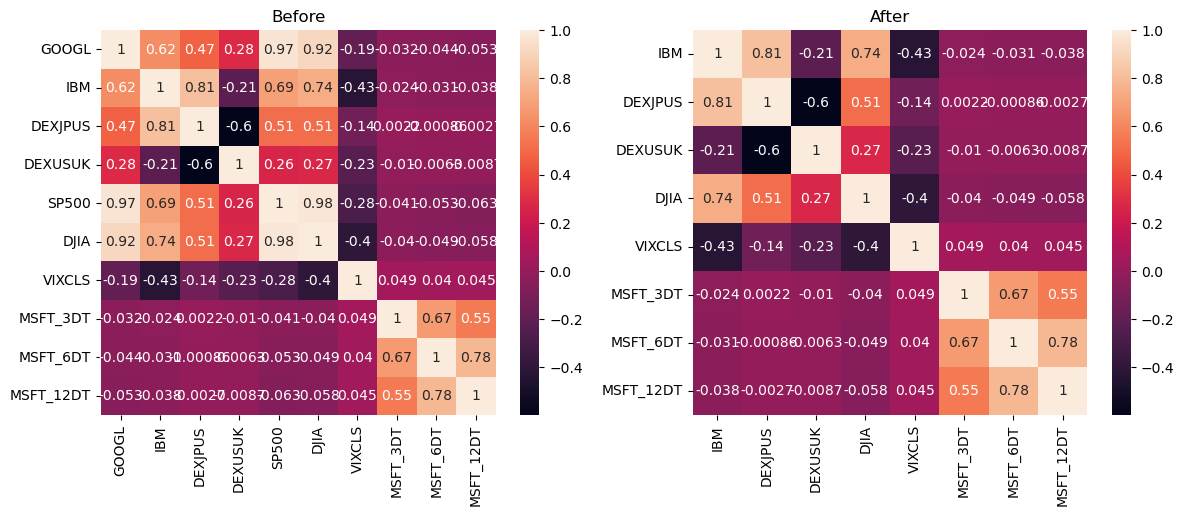

In [14]:
### START CODE HERE ###
fig, axs = plt.subplots(ncols=2, figsize=(14, 5))  # Create a figure with two subplots

correlation_matrix= X.corr()
sns.heatmap(correlation_matrix, annot=True, ax=axs[0])  # Plot heatmap on the first subplot
axs[0].set_title('Before')  # Set title for the first subplot

columns_to_drop = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[j]
            columns_to_drop.add(colname)
# Dropping the columns from the DataFrame
X = X.drop(columns=columns_to_drop)
sns.heatmap(X.corr(), annot=True, ax=axs[1])  # Plot heatmap on the second subplot
axs[1].set_title('After')  # Set title for the second subplot
print("DROPPED" , columns_to_drop)

In [15]:
X

,IBM,DEXJPUS,DEXUSUK,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2019-03-18,-0.627724,-0.605068,0.605312,-1.385739,-0.981036,-0.033901,-0.085389,0.270381
2019-03-19,-0.614039,-0.606967,0.665610,-1.392497,-0.925556,-0.080412,0.348001,-0.180635
2019-03-20,-0.657537,-0.605068,0.557074,-1.428338,-0.883343,0.546399,-0.154858,-0.077940
2019-03-21,-0.567609,-0.639886,0.379195,-1.373495,-0.917113,-0.753730,-0.500576,-0.417939
2019-03-22,-0.664867,-0.709521,0.599283,-1.489886,-0.573379,0.083491,0.065143,-0.136232
...,...,...,...,...,...,...,...,...
2023-12-19,2.939215,1.433972,-0.106204,1.559198,-1.049783,-0.664772,-0.028549,0.094711
2023-12-20,2.841830,1.443468,-0.243383,1.438829,-0.912289,0.626566,0.609767,0.490532
2023-12-21,2.888909,1.341548,-0.231323,1.520357,-0.914701,0.189919,0.117151,-0.020246
2023-12-22,2.976621,1.369402,-0.152935,1.515709,-0.989479,-0.033035,-0.165573,0.004491


### **Train/Test Model**

**Train/Test Split**

Split the dataset into training and testing sets. Reserve frist 70% of data for training and last 30% for testing.


In [16]:
from sklearn.model_selection import train_test_split
### START CODE HERE ###
test_size = 0.3
train_size = 0.7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, train_size=train_size, random_state=0, shuffle=False)
### START CODE HERE ###

**Initialize models**
- `Linear Regression`
- `Support Vector Regression` which `kernels` are `['linear','rbf','poly']` and `C` value are `[0.1, 1, 10, 100]`
- `Linear Regression` with `Gradient Descent` from `Lab2-2`


<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `LinearRegression()`
- `SVR()`
</details>

In [17]:
### START CODE HERE ###
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

grid_svr = { 
    'C': [ 0.1,1,10,100] ,
    'kernel': ['rbf', 'linear', 'poly'],
}
svrs = []
linearRegressor = LinearRegression()
sgr = SGDRegressor(max_iter=1000, learning_rate='constant', alpha=0.01)
for c in grid_svr['C']:
    for k in grid_svr['kernel']:
        model = SVR(C=c, kernel=k)
        svrs.append(model)
### END CODE HERE ###

**Train models**

Train all models with at least two X's columns.

<span style='color: orange;'>**BONUS POINTS**</span> for those who train with more than two or all X's columns.

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `.fit()`
- For the gradient descent, you'll need to perform multivariate gradient descent by yourself. Vectorizing or using matrices might make things easier.
</details>

In [18]:
### START CODE HERE ###
for svr in svrs:
    svr.fit(X_train, Y_train)
linearRegressor.fit(X_train, Y_train)
sgr.fit(X_train, Y_train)
### END CODE HERE ###

SGDRegressor(alpha=0.01, learning_rate='constant')

**Evaluate models**

Evaluate models with test set


<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `.predict()`
</details>

In [19]:
### START CODE HERE ###
y_pred_svrs = [
    svr.predict(X_test) for svr in svrs
]
y_pred_lr = linearRegressor.predict(X_test)
y_pred_sgr = sgr.predict(X_test)
### END CODE HERE ###

**Compare MSE from all models**

In [20]:
from sklearn.metrics import mean_squared_error
### START CODE HERE ###
print("--------MSE--------")
print("Linear Regression:",mean_squared_error(Y_test, y_pred_lr))
for i in range(len(svrs)):
    print("SVR with", svrs[i].kernel, "kernel and C =", svrs[i].C, ":", mean_squared_error(Y_test, y_pred_svrs[i]))
print("Linear with Gradient Descent:", mean_squared_error(Y_test, y_pred_sgr))
### END CODE HERE ###

--------MSE--------
Linear Regression: 3115.58599658792
SVR with rbf kernel and C = 0.1 : 7744.971615731716
SVR with linear kernel and C = 0.1 : 2276.20236076456
SVR with poly kernel and C = 0.1 : 7508.5649438854825
SVR with rbf kernel and C = 1 : 4633.8280897758705
SVR with linear kernel and C = 1 : 2773.763705689767
SVR with poly kernel and C = 1 : 5584.639099166698
SVR with rbf kernel and C = 10 : 3780.861862894072
SVR with linear kernel and C = 10 : 2839.7070115552337
SVR with poly kernel and C = 10 : 2684.7115722062836
SVR with rbf kernel and C = 100 : 3464.7705088436905
SVR with linear kernel and C = 100 : 2913.237967034435
SVR with poly kernel and C = 100 : 3185.2220107756934
Linear with Gradient Descent: 2967.505888325347


### **Compare y, y_prediction results from all models in Table & Graph format**
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your initial parameters value.</br>
<br>

|             | (Adj Close, MSFT) | Linear Regression Predictions | SVR Linear C= 0.1 | SVR Linear C= 1 | SVR Linear C= 10 | SVR Linear C= 100 | SVR RBF C= 0.1 | SVR RBF C= 1 | SVR RBF C= 10 | SVR RBF C= 100 | SVR Poly C= 0.1 | SVR Poly C= 1 | SVR Poly C= 10 | SVR Poly C= 100 | Linear Regression with GD |
|-------------|-------------------:|------------------------------:|-------------------:|----------------:|------------------:|-------------------:|-----------------:|---------------:|--------------:|---------------:|----------------:|---------------:|----------------:|----------------:|--------------------------:|
| 2022-05-26  |         268.696564 |                    257.196057 |          252.056274 |       260.576725 |        259.555290 |         260.207484 |       252.056274 |      260.576725 |     259.555290 |      260.207484 |      252.056274 |     260.576725 |     259.555290 |      260.207484 |                266.590971 |
| 2022-05-27  |         270.826965 |                    256.287965 |          253.646550 |       261.257640 |        259.291071 |         260.050399 |       253.646550 |      261.257640 |     259.291071 |      260.050399 |      253.646550 |     261.257640 |     259.291071 |      260.050399 |                265.611666 |
| 2022-05-31  |         266.329346 |                    249.449486 |          253.301557 |       256.852936 |        253.552787 |         254.359600 |       253.301557 |      256.852936 |     253.552787 |      254.359600 |      253.301557 |     256.852936 |     253.552787 |      254.359600 |                262.416681 |
| 2022-06-01  |         265.076691 |                    248.497186 |          250.866794 |       253.175338 |        250.932023 |         252.078873 |       250.866794 |      253.175338 |     250.932023 |      252.078873 |      250.866794 |     253.175338 |     250.932023 |      252.078873 |                259.184783 |
| 2022-06-02  |         268.775421 |                    254.458188 |          258.438015 |       260.657724 |        257.312872 |         258.185194 |       258.438015 |      260.657724 |     257.312872 |      258.185194 |      258.438015 |     260.657724 |     257.312872 |      258.185194 |                269.030529 |
| ...         |                ... |                           ... |                 ... |              ... |               ... |                ... |              ... |             ... |            ... |             ... |              ... |             ... |             ... |              ... |                       ... |




</details>

In [21]:
### START CODE HERE ###
resultDf = pd.DataFrame({
    'Actual': Y_test,
    'Linear Regression': y_pred_lr,
    'Linear with Gradient Descent': y_pred_sgr
})

for i in range(len(svrs)):
    resultDf['SVR K='+ svrs[i].kernel + ',C=' + str(svrs[i].C)] = y_pred_svrs[i]
resultDf
### END CODE HERE ###

,Actual,Linear Regression,Linear with Gradient Descent,"SVR K=rbf,C=0.1","SVR K=linear,C=0.1","SVR K=poly,C=0.1","SVR K=rbf,C=1","SVR K=linear,C=1","SVR K=poly,C=1","SVR K=rbf,C=10","SVR K=linear,C=10","SVR K=poly,C=10","SVR K=rbf,C=100","SVR K=linear,C=100","SVR K=poly,C=100"
2022-07-21,256.327332,270.591998,266.254961,215.326413,239.383078,211.190800,238.250042,257.628263,210.211614,254.732275,269.244966,243.036579,259.822438,269.978518,269.467751
2022-07-22,254.821075,264.897929,259.139162,214.276663,237.750571,211.978919,232.213238,248.494011,212.486749,242.696328,261.805457,230.559054,237.451761,262.279080,244.665030
2022-07-25,247.998352,261.725798,254.583143,215.104825,236.811494,209.509265,231.256852,246.105765,199.434085,238.614367,259.117254,209.952719,234.804380,259.561668,281.361036
2022-07-26,264.577515,280.643512,280.194593,214.938452,249.192797,176.022984,225.805305,268.136309,207.540269,224.586197,279.480072,297.077164,226.820772,279.328889,357.410444
2022-07-27,272.128754,279.263168,277.240821,216.071931,247.654485,209.424458,240.405226,266.989806,217.036139,259.271069,278.155040,262.252691,258.421611,278.383158,280.262563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-19,369.935883,284.867625,284.719846,216.808549,307.096015,232.519668,237.816059,295.175526,271.595558,236.872640,289.551048,314.731902,250.568064,287.786985,322.762459
2023-12-20,372.850525,286.290035,287.604885,216.946265,305.877419,232.231753,239.212660,296.557530,274.500398,242.045610,290.988716,334.537810,251.925382,289.143119,339.525974
2023-12-21,373.888580,290.288890,290.757839,217.098718,307.392403,230.814363,240.147710,300.123451,271.588323,241.212488,294.542351,326.131092,255.460971,292.823319,319.482771
2023-12-22,373.968445,284.454846,285.224378,216.942925,307.254512,231.876269,238.852620,295.639377,271.320086,238.647510,289.045678,317.661493,253.183144,287.185034,321.240384


<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your initial parameters value.</br>
<br>

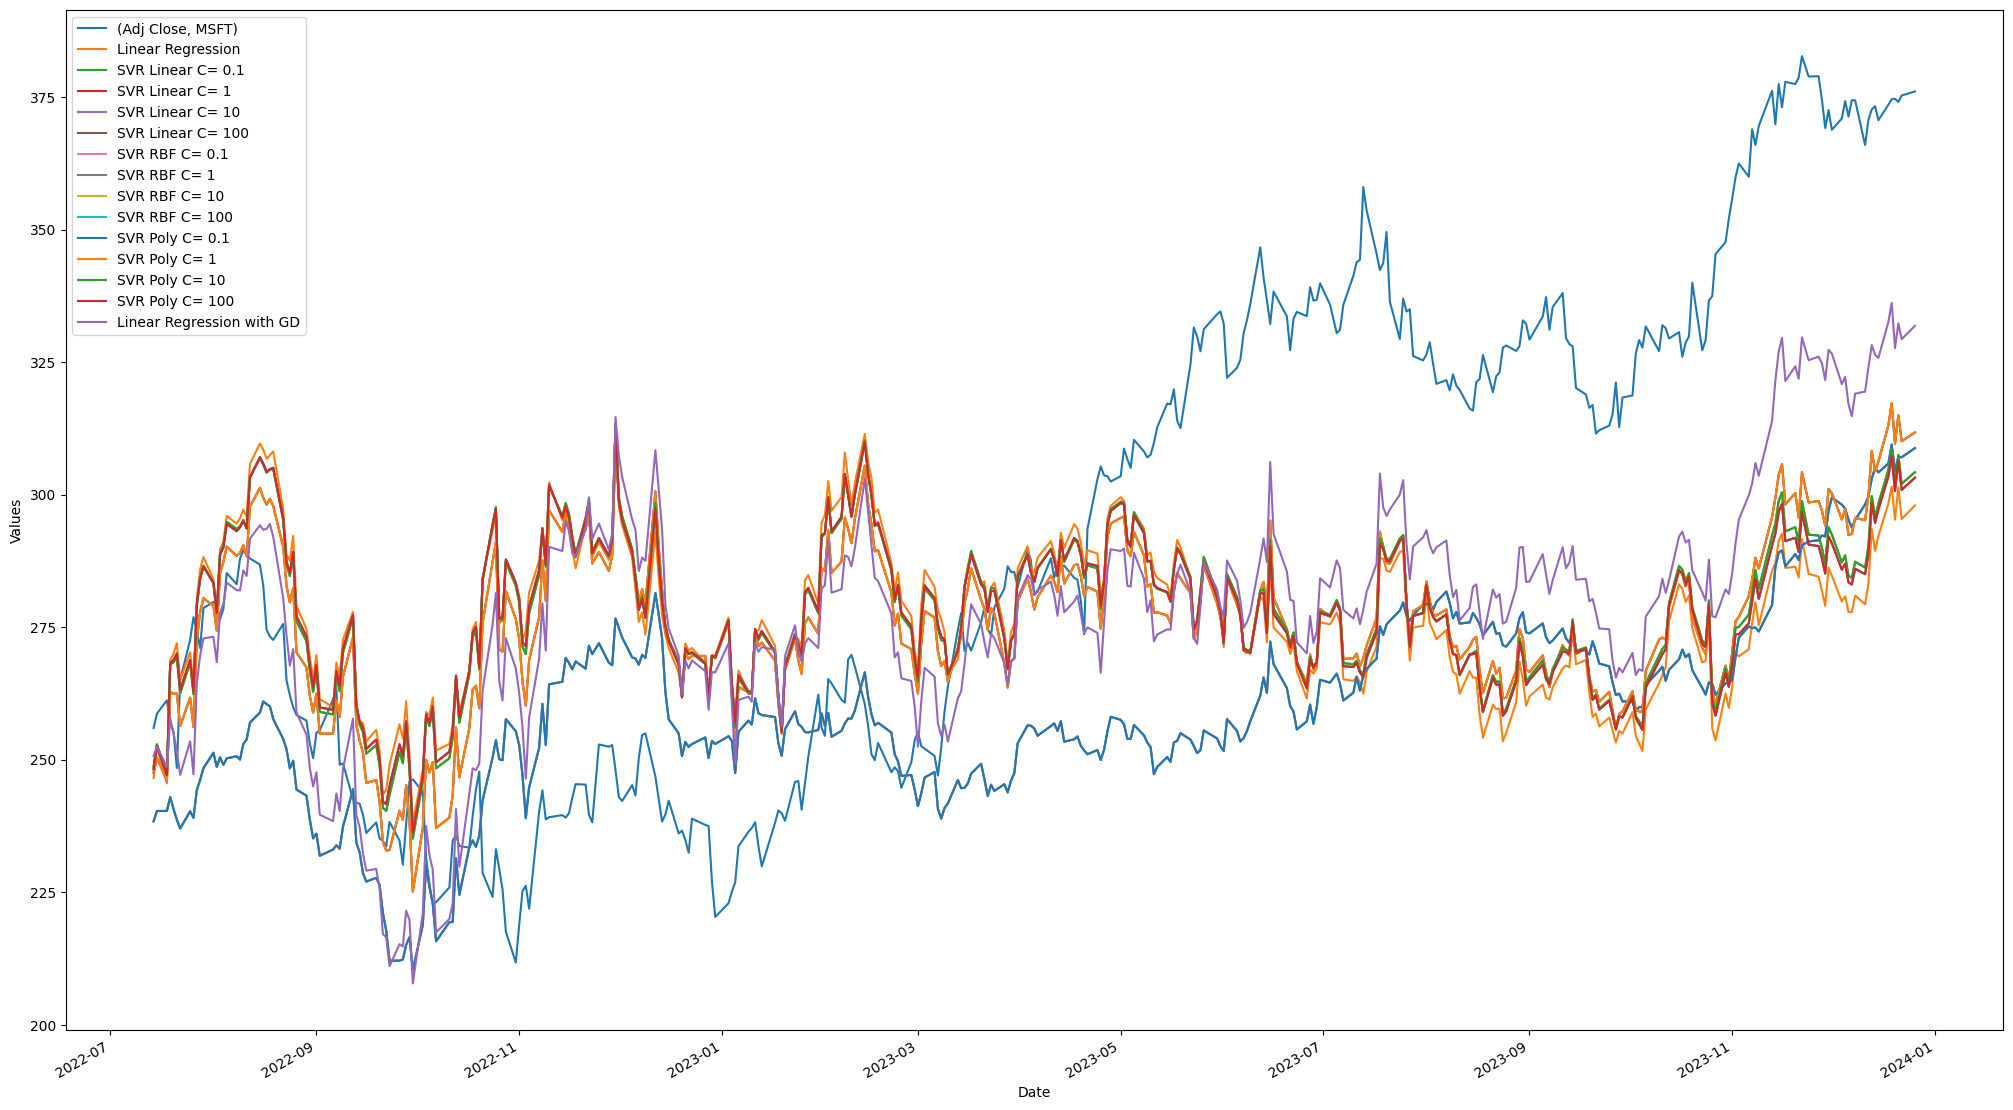



</details>

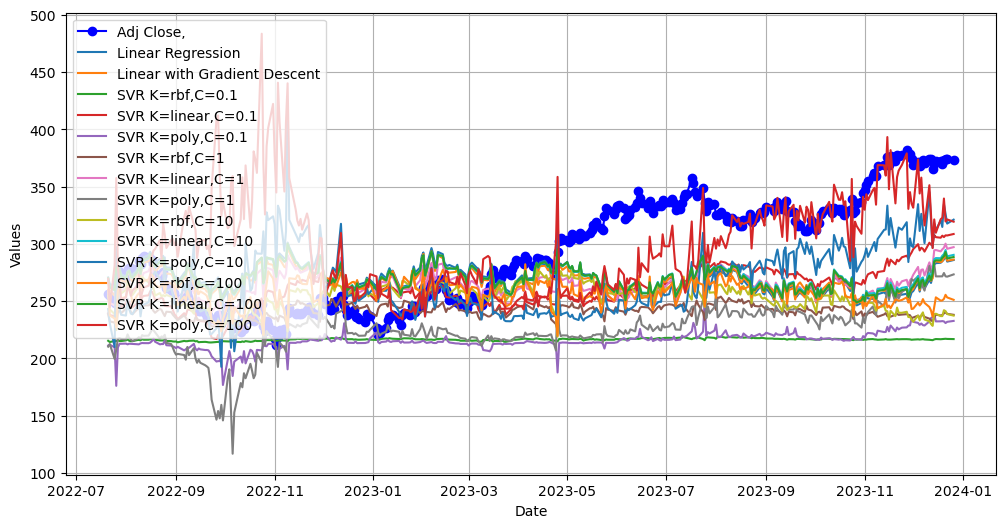

In [22]:
### START CODE HERE ###


# Plotting
plt.figure(figsize=(12, 6))
plt.plot(resultDf.index, resultDf['Actual'], label='Adj Close,', color='blue', marker='o')
for col in resultDf.columns[1:]:
    plt.plot(resultDf.index, resultDf[col], label=col)
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

### END CODE HERE ###

### Question
1. Rank Top 3 Models with Best prediction (Best MSE)
2. What would be the reason for large error from 2023-05 to 2024-01? 

## 1. top 3 models

In [23]:
accuracies = []
for col in resultDf.columns:
    accuracies.append((col, mean_squared_error(resultDf['Actual'], resultDf[col]) ))
accuracies.sort(key=lambda x: x[1])
accuracies[1:4]

[('SVR K=linear,C=0.1', 2276.20236076456),
 ('SVR K=poly,C=10', 2684.7115722062836),
 ('SVR K=linear,C=1', 2773.763705689767)]

## 2. Sudden trend changes